In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
from datetime import datetime

In [40]:
plPrice = pd.read_csv('plPrice17-19.csv')
plPrice.drop(columns = ['Hong Kong 8:30','Hong Kong 14:00','New York 9:30'],inplace = True)
plPrice.rename(columns = {'London 09:00':'Price'},inplace= True)
plPrice.dropna(how='any',inplace = True)
plPrice.to_csv('plPrice17-20Updated.csv')
plPrice['Date'] = pd.to_datetime(plPrice['Date'])
plPrice=plPrice[plPrice['Date'] < datetime.strptime('Jan 01, 2020', '%b %d, %Y').date()]
#plPrice=plPrice[plPrice['Date'] > datetime.strptime('Jan 01, 2019', '%b %d, %Y').date()]


FTSElist = pd.read_csv(r'fullFTSEStockList17-20.csv')
FTSElist.drop(columns = ['Unnamed: 0'],inplace = True)
display(FTSElist.head())

stock = pd.read_csv('stockCSVs/AAL.L17-20.csv')


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys


,0
0,AAL
1,ABF
2,ADM
3,AHT
4,ANTO


In [3]:
FTSEStocksEachQuarter = pd.read_csv(r'FTSEStocksEachQuarter.csv')
fullStockListDf = pd.read_csv(r'fullFTSEStockList17-20.csv')
fullStockListDf.drop(columns = 'Unnamed: 0', inplace = True)

FTSE = pd.read_csv(r'FTSE17-20.csv')
FTSE['Date'] = pd.to_datetime(FTSE['Date'])
FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 16, 2017', '%b %d, %Y').date()]
FTSE=FTSE[FTSE['Date'] < datetime.strptime('Jan 01, 2020', '%b %d, %Y').date()]


quarterCutOffDates = [   datetime.strptime('Jun 19, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 19, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 18, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 18, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 24, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 23, 2019', '%b %d, %Y').date(),
                          datetime.strptime('Dec 23, 2019', '%b %d, %Y').date()
                        ]
quarterNames = ['Q3,17','Q4,17', 'Q1,18', 'Q2,18', 'Q3,18', 'Q4,18', 'Q1,19', 'Q2,19', 'Q3,19', 'Q4,19']


FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 16, 2017', '%b %d, %Y').date()]
if len(quarterCutOffDates) == 10:
    quarterCutOffDates.append(datetime.strptime('Dec 23, 2019', '%b %d, %Y').date())

indexDivisors = pd.DataFrame({'Quarter CO Date': quarterCutOffDates[1:]}, index = quarterNames)
fullStockListDf

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the curre

,0
0,AAL
1,ABF
2,ADM
3,AHT
4,ANTO
5,AUTO
6,AV.
7,AVV
8,AZN
9,BA.


In [4]:
def tiltFTSE(tilt):
    #iterates over quarter in period
    for idx, quarter in enumerate(quarterNames):
        #gets index (trading days) for each quarter
        index = FTSE[(FTSE['Date'] >= quarterCutOffDates[idx]) & (FTSE['Date'] < quarterCutOffDates[idx+1])].Date.values

        #imports data for that quarter
        stockWeightsOpen = pd.read_csv(r'companyWeightsEachQuarter/companyWeights{0}Open.csv'.format(quarter))
        stockWeightsOpen.drop(columns = 'Unnamed: 0', inplace = True)

        stockWeightsClose = pd.read_csv(r'companyWeightsEachQuarter/companyWeights{0}Close.csv'.format(quarter))
        stockWeightsClose.drop(columns = 'Unnamed: 0', inplace = True)

        totalMCsOpen = pd.read_csv(r'totalMarketCapsEachQuarter/totalMarketCaps{0}Open.csv'.format(quarter))
        totalMCsOpen.drop(columns = 'Unnamed: 0', inplace = True)

        totalMCsClose = pd.read_csv(r'totalMarketCapsEachQuarter/totalMarketCaps{0}Close.csv'.format(quarter))
        totalMCsClose.drop(columns = 'Unnamed: 0', inplace = True)

        stockMarketCapsEachQuarterOpen = pd.read_csv(r'companyMarketCapsEachQuarter/companyMarketCaps{0}Open.csv'.format(quarter))
        stockMarketCapsEachQuarterOpen.drop(columns = 'Unnamed: 0', inplace = True)

        stockMarketCapsEachQuarterClose = pd.read_csv(r'companyMarketCapsEachQuarter/companyMarketCaps{0}Close.csv'.format(quarter))
        stockMarketCapsEachQuarterClose.drop(columns = 'Unnamed: 0', inplace = True)

        #iterates over each stock in the FTSE that quarter
        for stock in FTSEStocksEachQuarter[quarter]:
            #adds tilt from aray to the company weight
            stockWeightsOpen[stock] = stockWeightsOpen[stock].add(tilt.loc[stock][0])
            stockWeightsClose[stock] = stockWeightsClose[stock].add(tilt.loc[stock][0])

        #if weight is <0 then set to 0
        stockWeightsOpen[stockWeightsOpen < 0] = 0
        stockWeightsClose[stockWeightsClose < 0] = 0

        #calculates effective market caps using new weight and old market caps 
        newMarketCapsOpen = stockWeightsOpen*stockMarketCapsEachQuarterOpen.values
        newMarketCapsClose = stockWeightsClose*stockMarketCapsEachQuarterClose.values

        #calculates new total market cap each day
        newTotalMarketCapsOpen = newMarketCapsOpen.sum(axis=1).to_frame()
        newTotalMarketCapsClose = newMarketCapsClose.sum(axis=1).to_frame()

        #calculates index divisor to make sure price stays continuous over the change in quarter
        if idx == 0:
            #for the first quarter the reference price is the real FTSE price from that day - abitrary starting point
            indexDivisorForQuarter = newTotalMarketCapsOpen.values[0][0]/(FTSE[FTSE['Date'] == quarterCutOffDates[idx]]['Open'].values[0])
        else:
            indexDivisorForQuarter = newTotalMarketCapsOpen.values[0][0]/FTSEPriceQuarterly['Close'].values[-1]


        #calculates new tilted price using index divisor and tilted market caps

        FTSEPriceQuarterly = newTotalMarketCapsOpen.divide(indexDivisorForQuarter).set_index(index, drop=True)
        FTSEPriceQuarterly.rename(columns={0:"Open"}, inplace=True)
        FTSEPriceQuarterly['Close'] = newTotalMarketCapsClose.divide(indexDivisorForQuarter).set_index(index, drop=True)


        if idx == 0:
            FTSEPrice3yr = FTSEPriceQuarterly

        else:
            FTSEPrice3yr = FTSEPrice3yr.append(FTSEPriceQuarterly)


    
    return FTSEPrice3yr
   

In [11]:
pearsonVals = []
spearmanVals = []
for stock in FTSElist['0'].values:
    if stock[-1] == '.':
            stockPrice = pd.read_csv(f'stockCSVs/{stock}L17-20.csv')
    else:
        stockPrice = pd.read_csv(f'stockCSVs/{stock}.L17-20.csv')
    stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])
    stockPrice=stockPrice[stockPrice['Date'] < datetime.strptime('Jan 01, 2020', '%b %d, %Y').date()]
    stockPrice=stockPrice[stockPrice['Date'] > datetime.strptime('Jan 01, 2019', '%b %d, %Y').date()]
    
    p = pearsonr(stockPrice['Open'].values,plPrice['Price'].values)
    pearsonVals.append((p[0]))
    
    s = spearmanr(stockPrice['Open'].values,plPrice['Price'].values) 
    print(stockPrice['Open'].values.shape)
    spearmanVals.append((s[0]))

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  # Remove the CWD from sys.path while we load stuff.
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)
(253,)


In [6]:

corrCoeffs = pd.DataFrame({'Company':FTSElist['0'].values,'Pearson':pearsonVals,'Spearman':spearmanVals})
display(corrCoeffs[abs(corrCoeffs['Pearson'])>0.9])
display(corrCoeffs[abs(corrCoeffs['Spearman'])>0.9])

,Company,Pearson,Spearman
15,BKG,0.908942,0.838755
105,SVT,0.916990,0.902153


,Company,Pearson,Spearman
105,SVT,0.91699,0.902153


In [49]:
optimalTilts = pd.DataFrame(index = fullStockListDf['0'].values,data = {'Pearson':[i * 2 for i in pearsonVals]})
optimalTiltsSpearman = pd.DataFrame(index = fullStockListDf['0'].values,data = {'Spearman':[i * 2 for i in spearmanVals]} )
#optimalTilts[['Pearson','Spearman']] = corrCoeffs[['Pearson','Spearman']].values*2
optimalTilts.loc['BKG']



Pearson    1.817885
Name: BKG, dtype: float64

In [50]:
tiltedFTSE = tiltFTSE(optimalTiltsSpearman)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future v

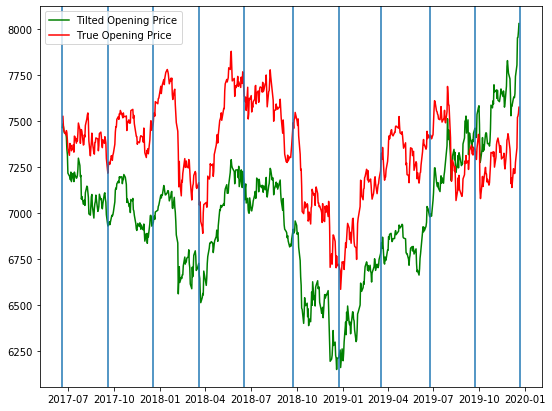

In [9]:
FTSEq317 = FTSE[(FTSE['Date'] > quarterCutOffDates[0]) & (FTSE['Date'] < quarterCutOffDates[10])]['Open'].values
FTSEq317date = FTSE[(FTSE['Date'] > quarterCutOffDates[0]) & (FTSE['Date'] < quarterCutOffDates[10])]['Date'].values

f = plt.figure(figsize=(9,7))
axs = f.add_subplot(111)
axs.plot(tiltedFTSE.index.values,tiltedFTSE['Open'].values,'g', label = 'Tilted Opening Price')
axs.plot(FTSEq317date,FTSEq317,'r', label = 'True Opening Price')
axs.legend()
for quarter in quarterCutOffDates:
    axs.axvline(x=quarter)
f.show()

In [34]:
simulatedFTSE = pd.read_csv('fullSimulatedFTSEPrice.csv')
simulatedFTSE.rename(columns = {'Unnamed: 0':'Date'},inplace = True)
simulatedFTSE['Date'] = pd.to_datetime(simulatedFTSE['Date'])
print(simulatedFTSE)
simulatedFTSE2019=simulatedFTSE[simulatedFTSE['Date'] > datetime.strptime('Dec 31, 2018', '%b %d, %Y').date()]
simulatedFTSE2019=simulatedFTSE2019[simulatedFTSE2019['Date'] < datetime.strptime('Dec 21, 2019', '%b %d, %Y').date()]
simulatedFTSE2019.shape

          Date         Open        Close
0   2017-06-19  7463.500000  7473.477589
1   2017-06-20  7482.118071  7411.354287
2   2017-06-21  7410.726705  7377.258490
3   2017-06-22  7372.946978  7364.105666
4   2017-06-23  7350.758979  7351.764564
..         ...          ...          ...
633 2019-12-16  7305.611691  7437.543921
634 2019-12-17  7428.127672  7463.525651
635 2019-12-18  7448.534398  7482.852106
636 2019-12-19  7488.377238  7520.091620
637 2019-12-20  7516.063599  7516.979314

[638 rows x 3 columns]
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.da

(248, 3)

In [51]:
#
print(tiltedFTSE['Open'].values.shape)
plPrice['Price'].values.shape
tiltedFTSE2019 = tiltedFTSE[tiltedFTSE.index > datetime.strptime('Dec 31, 2018', '%b %d, %Y')]
FTSE2019=FTSE[(FTSE['Date'] < datetime.strptime('Dec 21, 2019', '%b %d, %Y').date()) & (FTSE['Date'] > datetime.strptime('Dec 31, 2018', '%b %d, %Y').date())]

plPriceShort = plPrice[(plPrice.Date < datetime.strptime('Dec 21, 2019', '%b %d, %Y')) & (plPrice.Date > datetime.strptime('Jan 01, 2019', '%b %d, %Y').date())]
tiltedFTSE2019[:10]
correlationTiltedFTSE = pearsonr(tiltedFTSE2019['Open'].values,plPriceShort['Price'].values)
correlationFTSE = pearsonr(FTSE2019['Open'].values,plPriceShort['Price'].values)
correlationSimFTSE = pearsonr(simulatedFTSE2019['Open'].values,plPriceShort['Price'].values)
#print(plPriceShort['Date'].values.shape)
#print(tiltedFTSE2019.index.values.shape)
#tiltedFTSE
print(correlationTiltedFTSE)
print(correlationFTSE)
print(correlationSimFTSE)
print(pearsonr(simulatedFTSE2019['Open'].values,FTSE2019['Open'].values))

(638,)
(0.8276562410141188, 1.1941497684813028e-63)
(0.3095219019450635, 6.613763552165328e-07)
(0.14100496512969218, 0.02638922435258877)
(0.9664419901053918, 3.284310284160122e-147)
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys


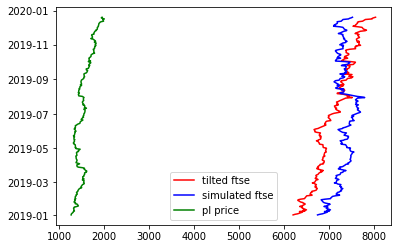

In [48]:
plt.plot(tiltedFTSE2019['Open'].values, tiltedFTSE2019.index.values,'r-' ,label = 'tilted ftse' )
plt.plot(simulatedFTSE2019['Open'].values, simulatedFTSE2019['Date'].values,'b-' ,label = 'simulated ftse')
plt.plot(plPriceShort['Price'].values, plPriceShort['Date'].values,'g-' ,label = 'pl price')
plt.legend()
plt.show()

In [46]:
simulatedFTSE2018=simulatedFTSE[simulatedFTSE['Date'] > datetime.strptime('Dec 31, 2017', '%b %d, %Y').date()]
simulatedFTSE2018=simulatedFTSE2018[simulatedFTSE2018['Date'] < datetime.strptime('Dec 22, 2018', '%b %d, %Y').date()]

#print(tiltedFTSE['Open'].values.shape)
plPrice['Price'].values.shape
#tiltedFTSE2018 = tiltedFTSE[tiltedFTSE.index > datetime.strptime('Dec 31, 2017', '%b %d, %Y')]
#tiltedFTSE2019 = tiltedFTSE[tiltedFTSE.index > datetime.strptime('Dec 31, 2018', '%b %d, %Y')]
tiltedFTSE2018=tiltedFTSE[(tiltedFTSE.index < datetime.strptime('Dec 22, 2018', '%b %d, %Y')) & (tiltedFTSE.index > datetime.strptime('Dec 31, 2017', '%b %d, %Y'))]

plPriceShort2018 = plPrice[(plPrice.Date < datetime.strptime('Dec 22, 2018', '%b %d, %Y')) & (plPrice.Date > datetime.strptime('Dec 31, 2017','%b %d, %Y'))]
tiltedFTSE2018[:10]

correlationTiltedFTSE2018 = pearsonr(tiltedFTSE2018['Open'].values,plPriceShort2018['Price'].values)
correlationFTSE2018 = pearsonr(FTSE2018['Open'].values,plPriceShort2018['Price'].values)
correlationSimFTSE2018 = pearsonr(simulatedFTSE2018['Open'].values,plPriceShort2018['Price'].values)

#print(plPriceShort2018['Date'].values.shape)
#print(tiltedFTSE2018.index.values.shape)
#tiltedFTSE

print(correlationTiltedFTSE2018)
print(correlationFTSE2018)
print(correlationSimFTSE2018)

(-0.6719265206307662, 4.629058807590759e-34)
(-0.5558901235748133, 1.3514858913969449e-21)
(-0.5372269955363437, 5.0802974293721404e-20)
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
